# This notebook demonstrates how to use Chachifuncs.py - which is used to clean raw battery data from the CALCE website 
#### Calce website: https://www.calce.umd.edu/batteries/data.htm

### First we import everything we need:

In [12]:
import databasewrappers_exp as dbexp
#import chachifuncs_exp as ccf
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Then we apply the get_all_data function, which takes raw data and cleans it into forms other components of this package can use. 

The function 'get_all_data' will take all the raw data from the specified folder within the root directory, separate out cycles and put them in a folder called 'Separated_Cycles', take those separated cycles and calculates dq/dv while simultaneously cleaning the data and saves those clean files in 'Clean_Separated_Cycles'.  
  
Three print messages should appear while this function is running:  
1. All data separated into cycles and saved in folder (specified folder).  
2. All cycles cleaned and saved in folder (specified folder).  
3. All clean cycles recombined and saved in folder (specifed folder).  

In [13]:
database = 'dqdvDataBase.db'

In [14]:
dbexp.process_data('data/example_files/Raw_Data_Examples/CS2_33_10_04_10.xlsx', database)

That database does not exist-creating it now.
What datatype do you have (either CALCE or MACCOR)CALCE
Processing that data
All data separated into cycles and saved in database.
Are there any voltages that should not be included? (y/n): y
Please enter a voltage to exclude from the data: 4.2
Datapoints within 0.03V of that voltage will be deleted
All cycles cleaned and saved in database
All clean cycles recombined and saved in database
Generating descriptors from the data set.


In [ ]:
dbexp.process_data('data/example_files/Raw_Data_Examples/EPP_180115_9_PAAmagstir_ECDECFEC.txt', database)

What datatype do you have (either CALCE or MACCOR)MACCOR
Processing that data
Index(['Rec', 'Cycle P', 'Cycle C', 'Step', 'TestTime', 'StepTime', 'Cap(Ah)',
       'Ener. [Wh]', 'Abs_Current(A)', 'Voltage(V)', 'Md', 'ES', 'DPT Time',
       'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9',
       'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15',
       'Const_Weight[mg]', 'MaccCharLab', 'Current(A)'],
      dtype='object')


C:\Users\Nicole\Miniconda3\lib\site-packages\pandas\core\generic.py:1534: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


All data separated into cycles and saved in database.
Are there any voltages that should not be included? (y/n): y
Please enter a voltage to exclude from the data: 0.0
Datapoints within 0.03V of that voltage will be deleted
All cycles cleaned and saved in database
All clean cycles recombined and saved in database
Generating descriptors from the data set.


### Plot the data with a colormap:

In [7]:
mydf = dbexp.dbfs.get_file_from_database('EPP_180115_9_PAAmagstir_ECDECFECCleanSet', database)
fig1 = plt.figure(figsize = (10,10), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.plasma(np.linspace(0, 1, int(max(mydf['Cycle C']))))
# https://matplotlib.org/examples/color/colormaps_reference.html
for name, group in mydf.groupby(['Cycle C']):
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from
    # 1 to 23
    #if name == 3 or name == 25 or name == 50:
    plt.plot(group['Voltage(V)'], group['dQ/dV'], c=colors[name-1], linewidth = 1, label =str(name))
leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
#this is to make the legend title larger
plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (C/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
plt.ylim(-0.05, 0.05)
plt.xlim(0,1.0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2, direction = 'in')
plt.savefig(fname = 'elenadatatest5.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 

KeyError: 'Cycle C'

### Plot using Calce format: 

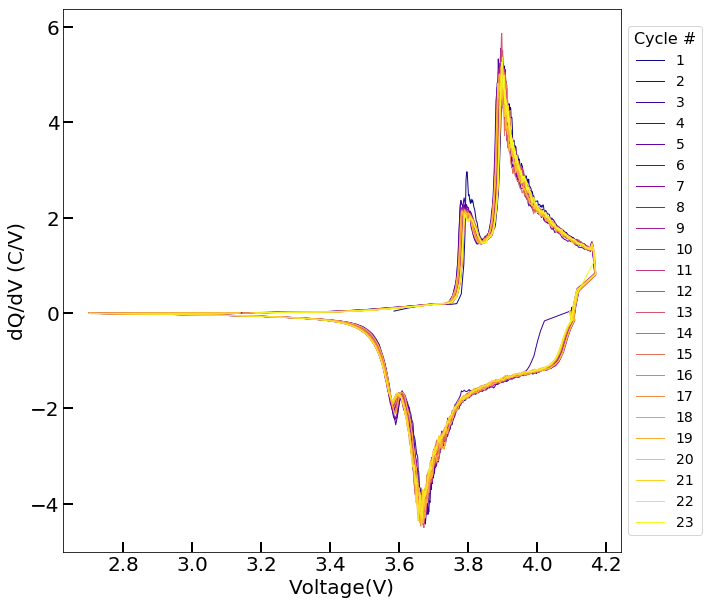

In [10]:
mydf = dbexp.dbfs.get_file_from_database('CS2_33_10_04_10CleanSet', database)
fig1 = plt.figure(figsize = (10,10), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.plasma(np.linspace(0, 1, int(max(mydf['Cycle_Index']))))
# https://matplotlib.org/examples/color/colormaps_reference.html
for name, group in mydf.groupby(['Cycle_Index']):
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from
    # 1 to 23
    #if name == 3 or name == 25 or name == 50:
    plt.plot(group['Voltage(V)'], group['Smoothed_dQ/dV'], c=colors[name-1], linewidth = 1, label =str(name))
leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
#this is to make the legend title larger
plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (C/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
#plt.ylim(-0.05, 0.05)
#plt.xlim(0,1.0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2, direction = 'in')
plt.savefig(fname = 'calceexampletest.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 

### Plot the descriptors: 

In [ ]:
mydf = dbexp.dbfs.get_file_from_database('CS2_33_10_04_10-descriptors', database)
fig1 = plt.figure(figsize = (8,8), facecolor = 'w', edgecolor= 'k')
myplot = plt.plot(mydf['index'],mydf['peakHeight(dQdV)-c0'])
#plt.plot(mydf['Voltage(V)'], mydf['dQ/dV'], color = 'red')
#plt.ylim(-20, 20)
plt.ylabel('peakheight')
plt.xlabel('index')

### Plot the descriptors and the plot:

In [ ]:
mydf = dbexp.dbfs.get_file_from_database('CS2_33_10_04_10CleanSet', database)
des_df = dbexp.dbfs.get_file_from_database('CS2_33_10_04_10-descriptors', database)
fig1 = plt.figure(figsize = (10,10), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Greys(np.linspace(0.5, 1, int(max(mydf['Cycle_Index']))))
for name, group in mydf.groupby(['Cycle_Index']):
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from
    # 1 to 23
    plt.plot(group['Voltage(V)'], group['Smoothed_dQ/dV'], c=colors[name-1], linewidth = 1, label =str(name))

#this is to make the legend title larger
plt.scatter(des_df['peakLocation(V)-c0'],des_df['peakHeight(dQdV)-c0'], facecolors = 'none', edgecolor = 'magenta', zorder = 5, s = 150, marker = 's', alpha = 1, label= 'charge peak 1')
plt.scatter(des_df['peakLocation(V)-c1'],des_df['peakHeight(dQdV)-c1'],facecolors = 'none', edgecolor = 'red', zorder = 5, s = 150, marker = '*', alpha = 1, label = 'charge peak 2')
#for the discharge peak height there has to be a negative sign since the descriptors gathered are an absolute value
plt.scatter(des_df['peakLocation(V)-d0'],-des_df['peakHeight(dQdV)-d0'], facecolors = 'none', edgecolor = 'blue',zorder = 5, s = 150, alpha = 1, label = 'discharge peak 1')
plt.scatter(des_df['peakLocation(V)-d1'],-des_df['peakHeight(dQdV)-d1'], color = 'orange', zorder = 5, s = 150, alpha = 1, marker = 'x', label = 'discharge peak 2')
# specifying zorder allows the dots to be on top
leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (C/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2)
plt.savefig(fname = 'data/ResultPics/pic1.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 
#cycle 1 and 2 will be different 

### old stuff: look at data 

If we want to look at the raw data's dq/dv plots, we can apply the calc_dq_dqdv function from ccf, as shown below with one example file of a CS2-type battery (A LiCoO2 cell). 

In [ ]:
raw_data_df = pd.read_excel('data/example_files/Separated_Cycles/CS2_33_10_04_10-Cycle12.xlsx')
#we load the file using pd.read_excel. The second argument, 1, indicates the sheet number to use. 

Looking at the data below using raw_data_df.head(), we can see the columns do not contain any dq/dv data, so we need to calculate it.

In [ ]:
raw_data_df.head(2)

Now we can calculate the dq/dv by applying the function calc_dv_dqdv to the dataframe. This function calculates the dV of row $i$ by $Voltage_i$ - $Voltage_{i-1}$. The same method is applied to calculate dQ, using the charge capacity for the charging part of the cycle, and the discharge capacity for the discharging part of  the cycle. Then dQ is divided by dV, yielding dQ/dV. 

In [ ]:
raw_data_dqdv = ccf.calc_dv_dqdv(raw_data_df)

Now we have dq/dv values in the dataframe. We can examine the data below:

In [ ]:
raw_data_dqdv.tail(3)
#We use tail instead of head because the first few dq/dv's are NaN's or 0's. You can look at the head too if you'd like. 

### Now let's plot the raw dQ/dV data. 

In [ ]:
fig1 = plt.figure(figsize = (8,8), facecolor = 'w', edgecolor= 'k')
myplot = plt.plot(raw_data_dqdv['Voltage(V)'], raw_data_dqdv['Charge_dQ/dV'])
plt.plot(raw_data_dqdv['Voltage(V)'], raw_data_dqdv['Discharge_dQ/dV'], color = 'red')
plt.ylim(-20, 20)
plt.ylabel('dQ/dV (C/V)')
plt.xlabel('Voltage(V)')

### Now lets look at the clean data:

In [ ]:
clean_cycle_df = pd.read_excel('data/example_files/Clean_Separated_Cycles/CS2_33_10_04_10-Cycle12Clean.xlsx')
#We just picked a random cycle. 

In [ ]:
fig1 = plt.figure(figsize = (8,8), facecolor = 'w', edgecolor= 'k')
myplot = plt.plot(clean_cycle_df['Voltage(V)'], clean_cycle_df['dQ/dV'])
plt.plot(clean_cycle_df['Voltage(V)'], clean_cycle_df['Smoothed_dQ/dV'], c = 'red')
plt.ylim(-10, 10)
plt.ylabel('dQ/dV (C/V)')
plt.xlabel('Voltage(V)')

### The recombined clean cycles, saved in 'Clean_Whole_Sets' are used in the DASH app. If we wanted to separated the charge cycles from the discharge cycles, we would use the sep_char_dis function. 

In [ ]:
whole_set_df = pd.read_excel('data/example_files/Clean_Whole_Sets/CS2_33_10_04_10CleanSet.xlsx')

In [ ]:
charge, discharge = ccf.sep_char_dis(whole_set_df)

Now we have two dataframes, charge and discharge, that we can plot separately. 

In [ ]:
cm = plt.get_cmap('hsv')
fig1 = plt.figure(figsize = (8,8), facecolor = 'w', edgecolor= 'k')
plt.plot(charge['Voltage(V)'], charge['dQ/dV'])
plt.plot(charge['Voltage(V)'], charge['Smoothed_dQ/dV'] )
plt.ylim(-1, 10)
plt.ylabel('dQ/dV (C/V)')
plt.xlabel('Voltage(V)')

In [ ]:
cm = plt.get_cmap('hsv')
fig1 = plt.figure(figsize = (8,8), facecolor = 'w', edgecolor= 'k')
plt.plot(discharge['Voltage(V)'], discharge['dQ/dV'])
plt.plot(discharge['Voltage(V)'], discharge['Smoothed_dQ/dV'] )
plt.ylim(-10, 1)
plt.ylabel('dQ/dV (C/V)')
plt.xlabel('Voltage(V)')

In [ ]:
exdf1 = pd.DataFrame([{1,2}, {3, 4}, {6,7}], [4, 5, 6])
exdf2 = pd.DataFrame([{11,12}, {13, 14}, {16,17}], [4, 5, 6])
exdf3 = pd.DataFrame([{111,112}, {113, 114}, {116,117}], [4, 5, 6])

In [ ]:
mydict = {'key1': exdf1, 'key2':exdf2, 'key3':exdf3 }

In [ ]:
mydf = pd.DataFrame()
for k, v in mydict.items():
    mydf = mydf.append(v, ignore_index = True)
mydf

In [7]:
cycle_df= pd.DataFrame({'cycle': [1, 1, 1, 2, 2 ,2, 2, 2, 3, 3, 3, 3, 4, 4,4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7], 'v': [0.0111, 0.221, 0.222, 0.223,0.224,0.331, 0.442, 0.5, 0.6, 0.771, 0.78, 0.779, 0.8, 0.9,0.92, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.161, 0.163, 0.164, 0.23, 0.26, 0.223, 0.224, 0.225, 0.21, 0.21]})
cycle_df

,cycle,v
0,1,0.0111
1,1,0.2210
2,1,0.2220
3,2,0.2230
4,2,0.2240
5,2,0.3310
6,2,0.4420
7,2,0.5000
8,3,0.6000
9,3,0.7710


In [13]:
cycle_df.loc[cycle_df.cycle < 4, 'Md'] = 'C'
cycle_df.loc[cycle_df.cycle >= 4, 'Md'] = 'D'
cycle_df

,cycle,v,Md
0,1,0.0111,C
1,1,0.2210,C
2,1,0.2220,C
3,2,0.2230,C
4,2,0.2240,C
5,2,0.3310,C
6,2,0.4420,C
7,2,0.5000,C
8,3,0.6000,C
9,3,0.7710,C


In [12]:
try: 
    for i in range(1, len(cycle_df)):
        newdv = cycle_df.loc[i, ('v')] - cycle_df.loc[i-1, ('v')]
        while abs(newdv) < 0.001:
            cycle_df = cycle_df.drop(index = i)
            cycle_df = cycle_df.reset_index(drop = True)
            newdv = cycle_df.loc[i, ('v')] - cycle_df.loc[i-1, ('v')]
        cycle_df.loc[i, ('dV')] = newdv
except KeyError:
    pass

In [13]:
cycle_df

,v,dV
0,0.0111,NaN
1,0.2210,0.2099
2,0.2220,0.0010
3,0.2230,0.0010
4,0.2240,0.0010
5,0.3310,0.1070
6,0.4420,0.1110
7,0.5000,0.0580
8,0.6000,0.1000
9,0.7710,0.1710


In [8]:
#if index % 2 == 0: 
newdf = cycle_df.drop_duplicates(subset = 'v')

In [9]:
newdf

,v
0,1
1,2
5,3
6,4
7,5
8,6
9,7
12,8
13,9
15,10


In [10]:
round(.23454, 2)

0.23

In [14]:
cycle_df['roundedV'] = round(cycle_df['v'], 2)

In [15]:
cycle_df

,v,dV,roundedV
0,0.0111,NaN,0.01
1,0.2210,0.2099,0.22
2,0.2220,0.0010,0.22
3,0.2230,0.0010,0.22
4,0.2240,0.0010,0.22
5,0.3310,0.1070,0.33
6,0.4420,0.1110,0.44
7,0.5000,0.0580,0.50
8,0.6000,0.1000,0.60
9,0.7710,0.1710,0.77


In [8]:
cycle_df['roundedV'] = round(cycle_df['v'], 2)
cycle_df = cycle_df.drop_duplicates(subset = ['roundedV', 'cycle'])
cycle_df = cycle_df.reset_index(drop = True)

In [9]:
newdf

,cycle,v,roundedV
0,1,0.0111,0.01
1,1,0.2210,0.22
2,2,0.2230,0.22
3,2,0.3310,0.33
4,2,0.4420,0.44
5,2,0.5000,0.50
6,3,0.6000,0.60
7,3,0.7710,0.77
8,3,0.7800,0.78
9,4,0.8000,0.80
